# Derivative checks for various gradients

In [1]:
%load_ext autoreload
from helper_functions import get_feature_data, get_label_data, calculate_accuracy
import numpy as np
from sklearn.preprocessing import normalize
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib

In [2]:
%autoreload
from neural_net import sigma, sigma_prime, verify_gradient

In [16]:
K = np.matrix(np.random.random((100,50)))
Y = np.matrix(np.random.random((50,150)))
b = 0.3
h, c1, c2, c3, c4, c5, c6 = verify_gradient(K, Y, b)
O1 = [h_i for h_i in h]
O2 = [h_i**2 for h_i in h]
O3 = [h_i**3 for h_i in h]

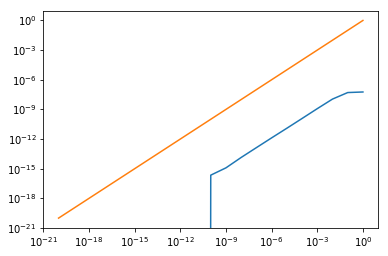

In [17]:
plt.loglog(h, c1, label="column 1")
plt.plot(h,O1)

## Finite difference for J_vec(K)
Compared to O(n^2)

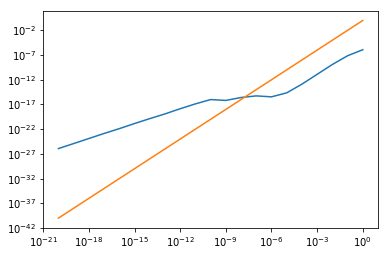

In [18]:
plt.loglog(h, c2, label="column 2")
plt.plot(h, O2)

## Finite differences for J_b
Compared to O(n) for norm evaluation

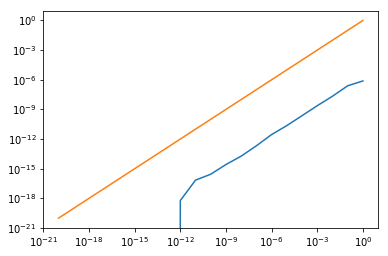

In [19]:
plt.loglog(h, c3)
plt.plot(h, O1)

Derivative check compared to O(n^2)

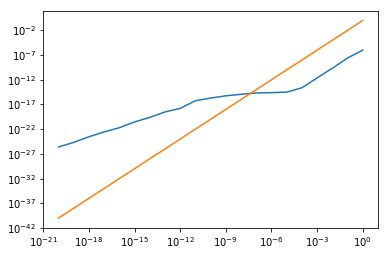

In [20]:
plt.loglog(h, c4)
plt.plot(h, O2)

## Finite differences for J_vec(Y)
First compared to O(n)

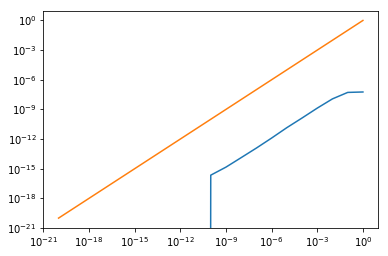

In [21]:
plt.loglog(h, c5)
plt.plot(h, O1)

Compare derivative to O(n^2)

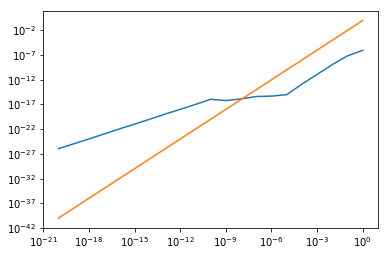

In [10]:
plt.loglog(h, c6)
plt.plot(h, O2)

## Adjoint Checks

In [51]:
%autoreload
from neural_net import J_K, J_K_T, J_b, J_b_T, J_Y, J_Y_T

In [27]:
m = K.shape[0]
nf = K.shape[1]
n = Y.shape[1]

vK = np.matrix(np.random.random((m*nf, 1)))
uK = np.matrix(np.random.random((m*n, 1)))
test = uK.T * J_K(K, Y, b, vK) - vK.T * J_K_T(K, Y, b, uK)
print(test)

[[-1.35525272e-20]]


In [30]:
uB = np.matrix(np.random.random((m,1))) 
vB = np.matrix(np.random.random((n,1)))
test = uB.T * J_b(K, Y, b, vB) - vB.T * J_b_T(K, Y, b, uB)
print(test)

[[-8.47032947e-22]]


In [52]:
uY = np.matrix(np.random.random((n*m, 1)))
vY = np.matrix(np.random.random((nf*n, 1)))
test = uY.T * J_Y(K, Y, b, vY) - vY.T * J_Y_T(K,Y, b, uY)
print(test)

[[-1.35525272e-20]]
